# Beckmann rate Data

This workbook contains the code and imports the data to explore the Beckmann hammett plot.

the data being pklotted is from...

"Hammett's Sigma Constants in Certain Electrophilic Reactions" D.E. Pearson, J.F. Baxter, and J.C. Martin, *The Journal of Organic Chemistry* **1952**, *17*, 1511-1518  https://doi.org/10.1021/jo50011a019
"The Question of Hyperconjugation or of Bulk Effect in the Beckmann Rearrangement." D.E. Pearson, J.D. Bruton, *The Journal of Organic Chemistry*, **1954**, *19*, 957-963.  https://doi.org/10.1021/jo01371a013 



## Setup Tools and Read Substituent Data Table

Here the data table for Steric substitutent constants is read in and processed. Also the libraries are imported and any functions defined

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_21/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"


#################################################################
### a function to fill in sigma for empty spaces in s+ and s- ###
#################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)


In [2]:
################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

#LFER_file = "Taft_Es_Williams.csv"   
#LFER_file = "LFER_HanschLeoTaft.csv"   
LFER_file = "LFER_Williams.csv"   ### This had values for a few ortho substituents

data_set = pd.read_csv(github_location_LFER_tables + LFER_file,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

#display(data_set)

########################################################
### Fill across sigma values and select substituents ###
########################################################

data_set=fill_sigma(data_set)
#display(data_set)

###############################
### Remove unneeded columns ###
###############################

if LFER_file == "LFER_HanschLeoTaft.csv":
    data_set.drop(labels = ["TABLE V", "TABLE I"],      #Trim "LFER_HanschLeoTaft.csv" data
    axis = 1,
    inplace = True)
elif LFER_file == "LFER_Williams.csv":
    data_set.drop(labels = ["Page"],                   #Trim "LFER_Williams.csv"" data
    axis = 1,
    inplace = True)
else:
    print("ERROR: No filename")

#######################################
### Sort by Steric Size and display ###
#######################################

#data_set.sort_values(by=['sigma'], inplace=True)
#data_set.sort_values(by=["E'(s)"], inplace=True)

display(data_set)

,sigma,s_plus,s_minus
Substituent,,,
m-Br,0.39,0.39,0.39
p-Br,0.23,0.15,0.25
m-C6H5,0.06,0.06,0.06
p-C6H5,-0.01,0.02,-0.18
m-CCCH3,0.10,0.10,0.10
...,...,...,...
o-I,1.34,1.34,1.34
p-C(CH3)3,-0.20,-0.26,-0.13
m-C(CH3)3,-0.10,-0.10,-0.10


## Read Experimental Data for Acid Hydrolysis
Here the data from the publication is read in. It had been saved in a csv file. the data is from...

"The activation energy of organic reactions. Part III. The kinetics of acid hydrolysis of esters." E.W. Timm, & C.N. Hinshelwood, J. Chem. Soc., 1938, 862-869. https://doi.org/10.1039/jr9380000862 


In [3]:
############################################
### Read in data from literature example ###
############################################

datafile = "21-Beckmann_3.csv"

Beckmann_data = pd.read_csv(github_location + datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 
#display(Beckmann_data.head())

###
### Note: The values of the rate constants are in units of 10^(-6) s^-1
###

###############################
### Remove unneeded columns ###
###############################

Beckmann_data.drop(labels = ["Name", "ref"], axis = 1, inplace = True)  # remove unwanted columns

###############################
### calculations            ###
###############################

Beckmann_data["log_k"] = np.log10(10**(-3) * Beckmann_data["kobs"])

display(Beckmann_data)


,kobs,log_k
Substituent,,
p-CH3,2.1010,-2.677574
p-C(CH3)3,2.0120,-2.696372
H,1.1270,-2.948076
p-Cl,0.7140,-3.146302
p-OCH3,13.2900,-1.876475
p-NO2,0.0310,-4.508638
m-NO2,0.0458,-4.339135
m-CH3,1.7630,-2.753748
"3,5-CH3",2.3770,-2.623971


## Combine Data Sets

Both data sets are indexed by "Substituent". The code below will combine the two data sets according to "Substituent" and take the intersection of the sets.

## Calculations

We need the log of the rate. Also we will convert the rate to SI units. The current units are in $10^{-4} s^{-1}$. We will convert to $s^{-1}$ by multiplying by $10^4$.


In [4]:
##################################################
### Combine data sets using the index column.  ###
### Data lines that share an index column will ###
### be combined, all other ignored.            ###
##################################################

combined_data = pd.concat([Beckmann_data, data_set], axis=1, join="inner")
#display(combined_data_acid)

#########################################################################
### Perform calculations on columns and add new columns with results  ###
#########################################################################

#combined_data["k"] = combined_data["k"] * 10**(-6)
##combined_data["log_k"] = np.log10(combined_data["k"])

#combined_data.drop(labels = ["o-NO2","o-Cl","o-CH3"], axis = 0, inplace = True)  # remove the "o-NO2" data point.
#combined_data.drop(labels = ["p-OH"], axis = 0, inplace = True)  # remove the "o-NO2" data point.

display(combined_data)


,kobs,log_k,sigma,s_plus,s_minus
Substituent,,,,,
p-CH3,2.1010,-2.677574,-0.14,-0.31,-0.17
p-C(CH3)3,2.0120,-2.696372,-0.20,-0.26,-0.13
H,1.1270,-2.948076,0.00,0.00,0.00
p-Cl,0.7140,-3.146302,0.23,0.11,0.19
p-OCH3,13.2900,-1.876475,-0.27,-0.78,-0.26
p-NO2,0.0310,-4.508638,0.78,0.78,1.24
m-NO2,0.0458,-4.339135,0.72,0.72,0.72
m-CH3,1.7630,-2.753748,-0.06,-0.06,-0.06
"3,5-CH3",2.3770,-2.623971,-0.20,-0.20,-0.20


## Plot and Curve Fits

The code below will extract the x,y data for our plots and perform the linear fit to the hammett equation. I have decided to put boths ets of data on the same plot for comparison sake. You will see exactly what i have done by examining the code.

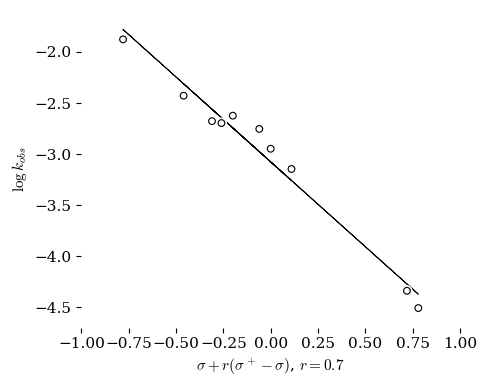

Beckmann (open circles)
slope  = -1.66
intercept = -3.076
RSQ = 0.974
LinregressResult(slope=-1.6620232431236355, intercept=-3.0763228505055062, rvalue=-0.9871477281836689, pvalue=1.175394987834875e-07, stderr=0.0951294481583788, intercept_stderr=0.04427557940079958)


In [5]:
#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

#x = combined_data["sigma"]
x = combined_data["s_plus"]
#x = combined_data["sigma"]+0.70*(combined_data["s_plus"]-combined_data["sigma"])  # Yukawa Tsuno

y =  combined_data["log_k"]


from scipy.stats import linregress
import matplotlib

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################

#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white",  edgecolors = "none", zorder=2)
ax.scatter(x,y, s=32, color="black",  edgecolors = "none", zorder=2)
ax.scatter(x,y, s=16, color="white",  edgecolors = "none", alpha = 1, zorder=2)

if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(x,y)
    fit = linfit.slope * x + linfit.intercept
    ax.plot(x, fit, color='black', zorder=1, linewidth=0.7)

if False:   #Set to True to see bounds of sigma and sigma plus values
    x1 = combined_data["sigma"]
    x2 = combined_data["s_plus"]

    #ax.scatter(x1,y, s=64, marker="|", color="white", zorder=1)
    ax.scatter(x1,y, s=16, marker="|", color="k", zorder=1)

    #ax.scatter(x2,y, s=64, marker="|", color="white", zorder=1)
    ax.scatter(x2,y, s=16, marker="|", color="k", zorder=1)




############################
### Set labels and scale ###
############################

#xlabel_string = "$\sigma$"
#xlabel_string = "$\sigma^+$"
xlabel_string = "$\sigma + r(\sigma^+-\sigma)$, $r = 0.7$"

ax.set(
#    title="Hammett Plot",       
          ylabel=r"$\log{k_{obs}}$", 
          xlabel=xlabel_string,                
          xlim=[-1,1],                  
#          ylim=[-6,-1]
         )



if False:    # Flag to run or not. True = run this section, False = skip it
    for name,x_place,y_place in zip(list(combined_data.index),x,y):
        plt.annotate(name, # this is the text
                    (x_place,y_place), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(30,0), # distance from text to points (x,y)
                    ha='left') # horizontal alignment can be left, right or center



fig.savefig("plot1.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

#make_axes_area_auto_adjustable(ax)
#####################################
### Print the line fit parameters ###
#####################################
print("Beckmann (open circles)")
print(f"slope  = {linfit.slope:0.2f}")
print(f"intercept = {linfit.intercept:0.3f}")
print(f"RSQ = {(linfit.rvalue**2):0.3f}")
print(linfit)




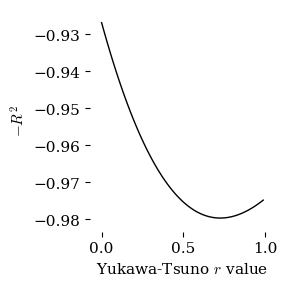

The optimal value for r is 0.727 for rsq = -0.97965


In [6]:
from scipy.optimize import minimize_scalar

df = combined_data

def RSQ_function(r):    # returns the RSQ for linefits using the given Yukawa-Tsuno r factor
    x = df["sigma"]+r*(df["s_plus"]-df["sigma"])
    linfit = linregress(x,y)
    return -(linfit.rvalue**2)


##########################################################
### Plot the value of -RSQ as the value of r is varied ###
##################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
ax.set(ylabel=r"$-R^2$", 
       xlabel=r"Yukawa-Tsuno $r$ value")

rsq_range=[]
r_range = np.arange(0,1,0.01)
for r in r_range:
    rsq = RSQ_function(r)
    rsq_range.append(rsq)
    
ax.plot(r_range,rsq_range)

fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()

##################################################
### Determine optimal r value to minimize -RSQ ###
##################################################

r_opt = minimize_scalar(RSQ_function)
print(f"The optimal value for r is {r_opt['x']:0.3f} for rsq = {r_opt['fun']:0.5f}")

In [7]:
x = df["sigma"]+0.325*(df["s_plus"]-df["sigma"])